In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Create 2 functions to refactor the MA strategy and make it modular
def ma_strat(ticker, short_ma, long_ma):
    # Read in data from Yahoo Finance for the relevant ticker
    #sp500 = data.DataReader(ticker, 'yahoo', start='01/01/2000')
    
    # Reading in my csv file since the Yahoo API doesn't work anymore
    file = 'C:\\Users\\txxv\\OneDrive - Chevron\\@ General Reference\\@ Reggie\\Trading Data\\SP500_historical_daily1962.csv'
    sp500 = pd.read_csv(file, index_col='Date', parse_dates=True)
    sp500.sort_index(inplace=True)
    
    # Calculate long and short moving averages
    sp500['short_ma'] = np.round(sp500['Close'].rolling(window=short_ma).mean(),2)
    sp500['long_ma'] = np.round(sp500['Close'].rolling(window=long_ma).mean(),2)
    
    # Create column with moving average spread differential
    sp500['short_ma-long_ma'] = sp500['short_ma'] - sp500['long_ma']
    
    # Set desired number of points as threshold for spread difference and create column containing strategy 'Stance'
    X=50
    sp500['Stance'] = np.where(sp500['short_ma-long_ma'] > X, 1, 0)
    sp500['Stance'] = np.where(sp500['short_ma-long_ma'] < X, -1, sp500['Stance'])
    sp500['Stance'].value_counts()
    
    # Create columns containing daily market log returns and strategy daily log returns
    sp500['Market Returns'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
    sp500['Strategy Returns'] = sp500['Market Returns'] * sp500['Stance'].shift(1)
    
    # Set strategy starting equity to 1 (i.e. 100%) and generate equity curve
    sp500['Strategy Equity'] = sp500['Strategy Returns'].cumsum() + 1
    
    sharpe = annualized_sharpe(sp500['Strategy Returns'])
    
    return (sp500['Strategy Returns'].cumsum()[-1], sharpe)

# Create function to calculate Sharpe ratio - Risk free rate element excluded for simplicity
def annualized_sharpe(returns, N=252):
    return np.sqrt(N) * (returns.mean() / returns.std())

In [5]:
# Use the numpy.linspace() function to create an array of values that represent...
# ...the different values of the short and long moving average windows that we want to test
short_ma = np.linspace(10,60,25,dtype=int)
long_ma = np.linspace(220,270,25,dtype=int)

In [6]:
# Initialize 2 numpy arrays to hold the results of the various backtest iterations.
# One array holds the ending P&L and the other holds the Sharpe ratio.
results_pnl = np.zeros((len(short_ma), len(long_ma)))
results_sharpe = np.zeros((len(short_ma), len(long_ma)))

In [8]:
# Test code: runs through all of the various combinations of short and long MA windows...
# ...that were generated above with the np.linspace functions
# NOTE: This code may take 10-20 minutes to run.
for i, shortma in enumerate(short_ma):
    for j, longma in enumerate(long_ma):
        pnl, sharpe = ma_strat('^GSPC', shortma, longma)
        results_pnl[i,j] = pnl
        results_sharpe[i,j] = sharpe


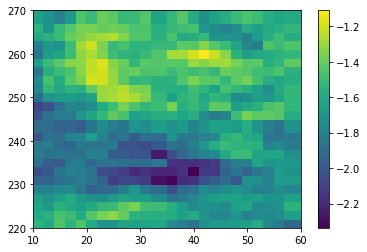

In [11]:
plt.pcolor(short_ma, long_ma, results_pnl)
plt.colorbar()
plt.show()

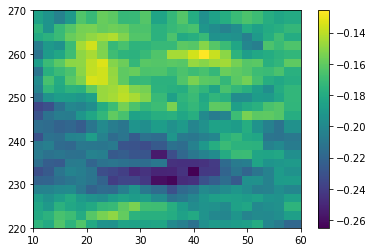

In [14]:
plt.pcolor(short_ma, long_ma, results_sharpe)
plt.colorbar()
plt.show()